# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Load the Data

### Importing libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading original excel file into dataframe - df_original. Checking the data by using head, tail and info - to veryfy data types, any missing values

In [2]:
df_original=pd.read_excel(r'C:\Users\katar\Downloads\CO2WZWHLQ3GpXlr5Rkeq4w_6bb40d853b58401ebd85f554991bc2f1_online_retail\Online_Retail.xlsx')

In [3]:
df_original.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df_original.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### First findings
Dataframe includes 541909 obserwations/rows and 8 columns. There are missing values in Description column and in Customer ID.
As we are not looking for patterns for individual customers, total column can be skipped. It need to be reviewed if we can delete rows with missing product description. 

If product description is linked to StockCode (as it should be), we can consider finding the right names by creating separte dataframe with StockCode and Product description, and use it to fill the gaps.

For purpose of this analysis we do not need columns InvoiceNo and CustomerID - they may be usefull in preparatory phrase, to understand the context.

### Using describe method to find first statistics

In [6]:
df_original.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Minimum and maximum price require additional veryfication. If it ould be real company data - it would require further investigation, wheather there was any technical problems while loading data or maybe problem with a transaction (I know such cases from real life - working with stock and sales data of large wholesale company). Data Analyst should react and make sure that neccessary steps were taken.

Lets try not to make any assumptions - and verify the data and decide what to do

## Cleaning the data

### Duplicates

In [7]:
duplicate_rows = df_original[df_original.duplicated()]

In [8]:
duplicate_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 517 to 541701
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    5268 non-null   object        
 1   StockCode    5268 non-null   object        
 2   Description  5268 non-null   object        
 3   Quantity     5268 non-null   int64         
 4   InvoiceDate  5268 non-null   datetime64[ns]
 5   UnitPrice    5268 non-null   float64       
 6   CustomerID   5225 non-null   float64       
 7   Country      5268 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 370.4+ KB


In [9]:
duplicate_rows.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


As those are data concerning sales, and incluse invoice number, stockcode and exact time of the rtansaction I have decided to remove all duplicated rows

In [10]:
df_cleaned=df_original.drop_duplicates()

In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


### Transaction values
In the task there is no specific request concerning salesvalue, but all companies are focused on profit so revenue should be quite important part of the analysis.
I have decided to add TotalValue column to the dataframe (as multiplication of quantity and price)

In [12]:
df_cleaned['TotalValue']=df_cleaned.Quantity*df_cleaned.UnitPrice

C:\Users\katar\AppData\Local\Temp\ipykernel_21848\2189722913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TotalValue']=df_cleaned.Quantity*df_cleaned.UnitPrice


### Missing values
We need to review how many missing values we have, in which columns, where can they came from and decide what to do with nulls/NaNs.
From df_cleaned.info() we could notice that there are large amunt of nulls in Description column and in CustomerID column. 

First I have created separate DF with all null values to review how many nulls we have, what are ransaction values related with nulls.

In [13]:
null_mask = df_cleaned.isnull().any(axis=1)
null_rows=df_cleaned[null_mask].sort_values('Quantity', ascending=False)
null_rows.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalValue
74614,542504,37413,NaN,5568,2011-01-28 12:03:00,0.00,NaN,United Kingdom,0.0
220843,556231,85123A,?,4000,2011-06-09 15:04:00,0.00,NaN,United Kingdom,0.0
263885,560040,23343,came coded as 20713,3100,2011-07-14 14:28:00,0.00,NaN,United Kingdom,0.0
115807,546139,84988,?,3000,2011-03-09 16:35:00,0.00,NaN,United Kingdom,0.0
74615,542505,79063D,NaN,2560,2011-01-28 12:04:00,0.00,NaN,United Kingdom,0.0
447035,574941,22197,POPCORN HOLDER,1820,2011-11-07 17:42:00,1.95,NaN,United Kingdom,3549.0
160541,550460,47556B,did a credit and did not tick ret,1300,2011-04-18 13:18:00,0.00,NaN,United Kingdom,0.0
203751,554550,47566B,incorrectly credited C550456 see 47,1300,2011-05-25 09:57:00,0.00,NaN,United Kingdom,0.0
82795,543258,84611B,NaN,1287,2011-02-04 16:06:00,0.00,NaN,United Kingdom,0.0
467796,576365,22197,POPCORN HOLDER,1130,2011-11-14 17:55:00,1.95,NaN,United Kingdom,2203.5


In [14]:
null_rows.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalValue
375429,569466,23270,incorrect stock entry.,-2880,2011-10-04 11:42:00,0.0,NaN,United Kingdom,-0.0
113580,545990,84598,check,-3000,2011-03-08 13:07:00,0.0,NaN,United Kingdom,-0.0
263884,560039,20713,wrongly marked. 23343 in box,-3100,2011-07-14 14:27:00,0.0,NaN,United Kingdom,-0.0
323458,565304,16259,NaN,-3167,2011-09-02 12:18:00,0.0,NaN,United Kingdom,-0.0
341601,566768,16045,NaN,-3667,2011-09-14 17:53:00,0.0,NaN,United Kingdom,-0.0
431381,573596,79323W,"Unsaleable, destroyed.",-4830,2011-10-31 15:17:00,0.0,NaN,United Kingdom,-0.0
115818,546152,72140F,throw away,-5368,2011-03-09 17:25:00,0.0,NaN,United Kingdom,-0.0
225528,556687,23003,Printing smudges/thrown away,-9058,2011-06-14 10:36:00,0.0,NaN,United Kingdom,-0.0
225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.0,NaN,United Kingdom,-0.0
225530,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.0,NaN,United Kingdom,-0.0


In [15]:
null_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135037 entries, 74614 to 225530
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    135037 non-null  object        
 1   StockCode    135037 non-null  object        
 2   Description  133583 non-null  object        
 3   Quantity     135037 non-null  int64         
 4   InvoiceDate  135037 non-null  datetime64[ns]
 5   UnitPrice    135037 non-null  float64       
 6   CustomerID   0 non-null       float64       
 7   Country      135037 non-null  object        
 8   TotalValue   135037 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 10.3+ MB


In [16]:
null_rows.describe()

,Quantity,UnitPrice,CustomerID,TotalValue
count,135037.000000,135037.000000,0.0,135037.000000
mean,1.996868,8.078342,NaN,10.719192
std,66.705155,151.924958,NaN,157.992412
min,-9600.000000,-11062.060000,NaN,-17836.460000
25%,1.000000,1.630000,NaN,2.460000
50%,1.000000,3.290000,NaN,4.960000
75%,3.000000,5.490000,NaN,10.790000
max,5568.000000,17836.460000,NaN,13541.330000


### No value null rows
As list of nulls was quite long, with mamy lines suggesting that we have stock corrections, gratis, damagest etc. on the list, and significant nymber of rows have 0 TotalValue - I have decided to get only no value lines out of it - to review the data.

As our task was to analyse sales - after reviewing the data I have decided to remove all no value rows from analysis.

Additionally, as we will not analyse data per customer, we will not fill missing CustomerID data, and remove the column as not usefull in the analysis process. This step will be done after reviewing outliers.

If we were to analyse sales per customer we can try to find missing customer data by creating a dataframe containing unique dataconcerning invoice no and customer ID.

In [17]:
no_value=df_cleaned.query('UnitPrice<=0')
no_value.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalValue
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,0.0
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,0.0
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0.0
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0.0
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0


In [18]:
no_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2512 entries, 622 to 538919
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    2512 non-null   object        
 1   StockCode    2512 non-null   object        
 2   Description  1058 non-null   object        
 3   Quantity     2512 non-null   int64         
 4   InvoiceDate  2512 non-null   datetime64[ns]
 5   UnitPrice    2512 non-null   float64       
 6   CustomerID   40 non-null     float64       
 7   Country      2512 non-null   object        
 8   TotalValue   2512 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 196.2+ KB


In [19]:
df_cleaned_with_value=df_cleaned.query('UnitPrice>0')
df_cleaned_with_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534129 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    534129 non-null  object        
 1   StockCode    534129 non-null  object        
 2   Description  534129 non-null  object        
 3   Quantity     534129 non-null  int64         
 4   InvoiceDate  534129 non-null  datetime64[ns]
 5   UnitPrice    534129 non-null  float64       
 6   CustomerID   401564 non-null  float64       
 7   Country      534129 non-null  object        
 8   TotalValue   534129 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 40.8+ MB


## Distribution of the data and outliers
As mentioned before, minimum and maqimum quantity seemed to be outliers - lets check distibution of the Quantyty by vizualisation

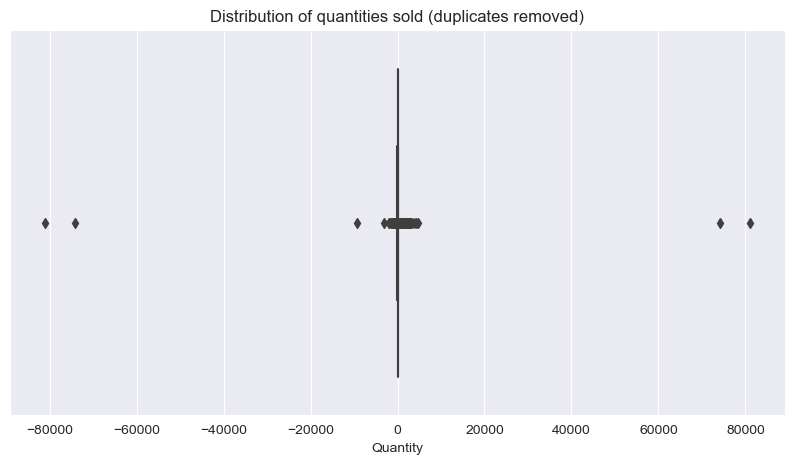

In [20]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.boxplot(x=df_cleaned_with_value['Quantity']).set(title='Distribution of quantities sold (duplicates removed)')
plt.show()

Quantitis above 60000 and below -60000 seems to be symetric. Lets check them

In [21]:
outliers=df_cleaned_with_value.query('Quantity<-60000 | Quantity>60000')
outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalValue
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.6


We can see that our negative and positive outliers have no influence on total sales - those lines include sales and return of goods (or invoice corrections) on the same day. We can keep it as it is - but to make data data statistics more reliable I have decided to remove those outliers from analysis.

As we do not need customer data for the analysys - lets remove this column using .drop()

In [22]:
df_cleaned_wo_outliers=df_cleaned_with_value.query('Quantity>-50000 & Quantity<50000')
df_cleaned_wo_outliers.drop('CustomerID',  axis='columns', inplace=True)
df_cleaned_wo_outliers.describe()

C:\Users\katar\AppData\Local\Temp\ipykernel_21848\860397931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_wo_outliers.drop('CustomerID',  axis='columns', inplace=True)


,Quantity,UnitPrice,TotalValue
count,534125.000000,534125.000000,534125.000000
mean,9.916892,4.695887,18.250655
std,40.787842,95.079545,128.602741
min,-9360.000000,0.001000,-38970.000000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.100000,9.900000
75%,10.000000,4.130000,17.570000
max,4800.000000,38970.000000,38970.000000


In [23]:
df_cleaned_wo_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534125 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    534125 non-null  object        
 1   StockCode    534125 non-null  object        
 2   Description  534125 non-null  object        
 3   Quantity     534125 non-null  int64         
 4   InvoiceDate  534125 non-null  datetime64[ns]
 5   UnitPrice    534125 non-null  float64       
 6   Country      534125 non-null  object        
 7   TotalValue   534125 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.7+ MB


After removing customer data we have no NaN in the df

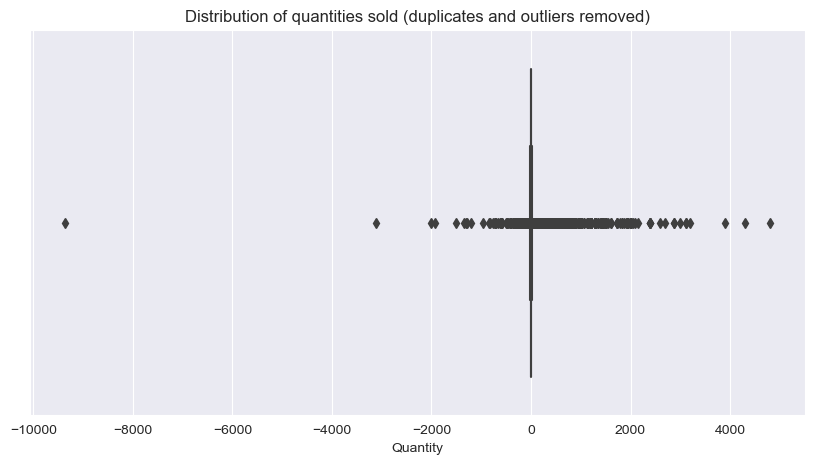

In [24]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.boxplot(x=df_cleaned_wo_outliers['Quantity']).set(title='Distribution of quantities sold (duplicates and outliers removed)')
plt.show()

<Figure size 1000x500 with 0 Axes>

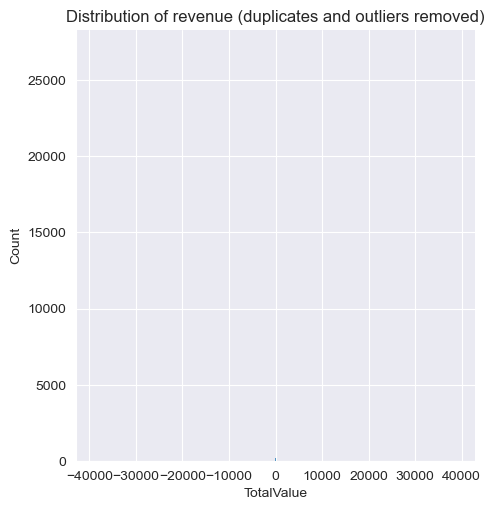

In [25]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.displot(x=df_cleaned_wo_outliers['TotalValue']).set(title='Distribution of revenue (duplicates and outliers removed)')
plt.show()

## Final data transformation

### Adding time related colums
As our data is cleaned (without duplicates, outliers), we need to add some columns to answer our questions. 
We need to import datetime to be able to extract YearMonth and DayName data. We will need weekday data as well - to sort DayNames properly.

In [26]:
import datetime as dt

In [27]:
df_cleaned_wo_outliers['DayName']=df_cleaned_wo_outliers['InvoiceDate'].dt.day_name()

C:\Users\katar\AppData\Local\Temp\ipykernel_21848\2757746066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_wo_outliers['DayName']=df_cleaned_wo_outliers['InvoiceDate'].dt.day_name()


In [28]:
df_cleaned_wo_outliers['WeekDay']=df_cleaned_wo_outliers['InvoiceDate'].dt.weekday

C:\Users\katar\AppData\Local\Temp\ipykernel_21848\1295933088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_wo_outliers['WeekDay']=df_cleaned_wo_outliers['InvoiceDate'].dt.weekday


In [29]:
df_cleaned_wo_outliers['YearMonth']=df_cleaned_wo_outliers['InvoiceDate'].dt.to_period('M')

C:\Users\katar\AppData\Local\Temp\ipykernel_21848\3745670570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_wo_outliers['YearMonth']=df_cleaned_wo_outliers['InvoiceDate'].dt.to_period('M')


In [30]:
stock_dict=df_cleaned_wo_outliers[['StockCode','Description']].drop_duplicates().sort_values('Description')

### Descriptions of articles
To make sure that we have only one description for one product code (according to project description StockCode is a unique product ID, so it sould have only one description). Clearing this out will allow us to analyse best selling products with their names, not only SockCodes.

In [31]:
stock_dict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4176 entries, 1057 to 167007
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StockCode    4176 non-null   object
 1   Description  4176 non-null   object
dtypes: object(2)
memory usage: 97.9+ KB


In [32]:
stock_dict.head(10)

,StockCode,Description
1057,72800B,4 PURPLE FLOCK DINNER CANDLES
309257,23437,50'S CHRISTMAS GIFT BAG LARGE
276939,23345,DOLLY GIRL BEAKER
334343,23391,I LOVE LONDON MINI BACKPACK
379954,23391,I LOVE LONDON MINI RUCKSACK
371165,23472,NINE DRAWER OFFICE TIDY
5400,22167,OVAL WALL MIRROR DIAMANTE
288596,23438,RED SPOT GIFT BAG LARGE
40,22900,SET 2 TEA TOWELS I LOVE LONDON
115204,23007,SPACEBOY BABY GIFT SET


In [33]:
stock_dict_count=pd.DataFrame(stock_dict.groupby('StockCode')['Description'].count().sort_values())

In [34]:
stock_dict_count.tail(10)

,Description
StockCode,
23209,3
23240,3
23535,3
23370,3
23231,3
23366,3
23396,3
23413,3
23236,4


As wee can see some codes have even different product names in the database. 

In [35]:
stock_dict_multiplied_codes=stock_dict_count.query('Description>1')

In [36]:
stock_dict_multiplied_codes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 23148 to 23196
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Description  220 non-null    int64
dtypes: int64(1)
memory usage: 3.4+ KB


I have decided to creata dataframe with unique StockCode and their Description by droping duplicates basing on StockCode column.

New dataframe has been merged with cleaned data on StockCode column.

In [37]:
stock_dict_unique=stock_dict.drop_duplicates('StockCode')

In [38]:
stock_dict_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 1057 to 167007
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StockCode    3937 non-null   object
 1   Description  3937 non-null   object
dtypes: object(2)
memory usage: 92.3+ KB


In [39]:
df_cleaned_wo_outliers=df_cleaned_wo_outliers.merge(stock_dict_unique, how='left', on='StockCode')
df_cleaned_wo_outliers.head()

,InvoiceNo,StockCode,Description_x,Quantity,InvoiceDate,UnitPrice,Country,TotalValue,DayName,WeekDay,YearMonth,Description_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,Wednesday,2,2010-12,CREAM HANGING HEART T-LIGHT HOLDER
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Wednesday,2,2010-12,WHITE METAL LANTERN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,Wednesday,2,2010-12,CREAM CUPID HEARTS COAT HANGER
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Wednesday,2,2010-12,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Wednesday,2,2010-12,RED WOOLLY HOTTIE WHITE HEART.


### Checking negative values 
For veryfication purposes I have created separate data frames with only negative and only positive values.

In [40]:
negative_quantities=df_cleaned_wo_outliers.query('Quantity<0').sort_values('Quantity')
negative_quantities.head(10)

,InvoiceNo,StockCode,Description_x,Quantity,InvoiceDate,UnitPrice,Country,TotalValue,DayName,WeekDay,YearMonth,Description_y
4216,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,United Kingdom,-280.80,Thursday,3,2010-12,ROTATING SILVER ANGELS T-LIGHT HLDR
157742,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,United Kingdom,-6539.40,Monday,0,2011-04,FAIRY CAKE FLANNEL ASSORTED COLOUR
157741,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,United Kingdom,-3700.00,Monday,0,2011-04,GIN + TONIC DIET METAL SIGN
157740,C550456,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1930,2011-04-18 13:08:00,2.55,United Kingdom,-4921.50,Monday,0,2011-04,CREAM HANGING HEART T-LIGHT HOLDER
221184,C556522,22920,HERB MARKER BASIL,-1515,2011-06-13 11:21:00,0.55,United Kingdom,-833.25,Monday,0,2011-06,HERB MARKER BASIL
184879,C552995,M,Manual,-1350,2011-05-12 15:19:00,0.16,United Kingdom,-216.00,Thursday,3,2011-05,Manual
157739,C550456,47566B,TEA TIME PARTY BUNTING,-1300,2011-04-18 13:08:00,2.55,United Kingdom,-3315.00,Monday,0,2011-04,TEA TIME PARTY BUNTING
385378,C570556,20971,PINK BLUE FELT CRAFT TRINKET BOX,-1296,2011-10-11 11:10:00,1.06,United Kingdom,-1373.76,Tuesday,1,2011-10,PINK BLUE FELT CRAFT TRINKET BOX
372527,C569552,15034,PAPER POCKET TRAVELING FAN,-1200,2011-10-04 17:44:00,0.07,United Kingdom,-84.00,Tuesday,1,2011-10,PAPER POCKET TRAVELING FAN
180025,C552568,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,-960,2011-05-10 12:04:00,0.21,United Kingdom,-201.60,Tuesday,1,2011-05,WORLD WAR 2 GLIDERS ASSTD DESIGNS


In [41]:
positive_quantities=df_cleaned_wo_outliers.query('Quantity>0').sort_values('Quantity', ascending=False)
positive_quantities.head(10)

,InvoiceNo,StockCode,Description_x,Quantity,InvoiceDate,UnitPrice,Country,TotalValue,DayName,WeekDay,YearMonth,Description_y
415970,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,United Kingdom,1008.00,Thursday,3,2011-10,WORLD WAR 2 GLIDERS ASSTD DESIGNS
203124,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,United Kingdom,3096.00,Friday,4,2011-05,POPCORN HOLDER
96034,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,United Kingdom,3202.92,Tuesday,1,2011-02,EMPIRE DESIGN ROSETTE
267141,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,United Kingdom,191.16,Tuesday,1,2011-07,ESSENTIAL BALM 3.5g TIN IN ENVELOPE
51851,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,United Kingdom,6539.40,Tuesday,1,2011-01,FAIRY CAKE FLANNEL ASSORTED COLOUR
158140,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,United Kingdom,6539.40,Monday,0,2011-04,FAIRY CAKE FLANNEL ASSORTED COLOUR
427928,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2011-11-02 11:24:00,0.32,United Kingdom,960.00,Wednesday,2,2011-11,SMALL CHINESE STYLE SCISSOR
4854,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,United Kingdom,518.40,Thursday,3,2010-12,WORLD WAR 2 GLIDERS ASSTD DESIGNS
287277,562439,84879,ASSORTED COLOUR BIRD ORNAMENT,2880,2011-08-04 18:06:00,1.45,United Kingdom,4176.00,Thursday,3,2011-08,ASSORTED COLOUR BIRD ORNAMENT
198200,554272,21977,PACK OF 60 PINK PAISLEY CAKE CASES,2700,2011-05-23 13:08:00,0.42,United Kingdom,1134.00,Monday,0,2011-05,PACK OF 60 PINK PAISLEY CAKE CASES


Final look on the cleaned dataframe

In [42]:
df_cleaned_wo_outliers.head()

,InvoiceNo,StockCode,Description_x,Quantity,InvoiceDate,UnitPrice,Country,TotalValue,DayName,WeekDay,YearMonth,Description_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,Wednesday,2,2010-12,CREAM HANGING HEART T-LIGHT HOLDER
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Wednesday,2,2010-12,WHITE METAL LANTERN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,Wednesday,2,2010-12,CREAM CUPID HEARTS COAT HANGER
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Wednesday,2,2010-12,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Wednesday,2,2010-12,RED WOOLLY HOTTIE WHITE HEART.


## Groupng and vizualisation of data to answer business questions

## Sales value and quantity over time - busiest months and days of the week

In [43]:
grouped_quantity_yearmonth=pd.DataFrame(df_cleaned_wo_outliers.groupby(['YearMonth'])['Quantity'].sum()).reset_index()

In [44]:
grouped_quantity_yearmonth

,YearMonth,Quantity
0,2010-12,342009
1,2011-01,307255
2,2011-02,280069
3,2011-03,371424
4,2011-04,294309
5,2011-05,389133
6,2011-06,381175
7,2011-07,393666
8,2011-08,408675
9,2011-09,562243


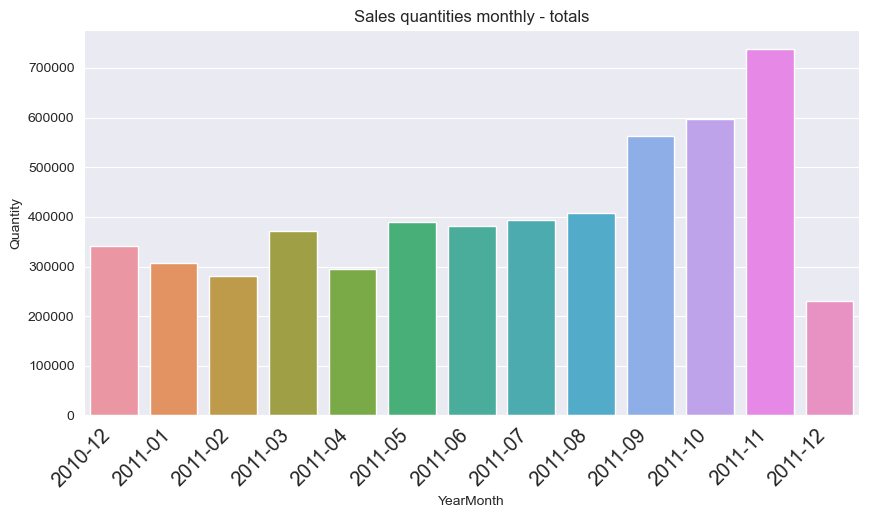

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(grouped_quantity_yearmonth, x='YearMonth', y='Quantity').set(title='Sales quantities monthly - totals')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

In [46]:
grouped_value_yearmonth=pd.DataFrame(df_cleaned_wo_outliers.groupby(['YearMonth'])['TotalValue'].sum()).reset_index()

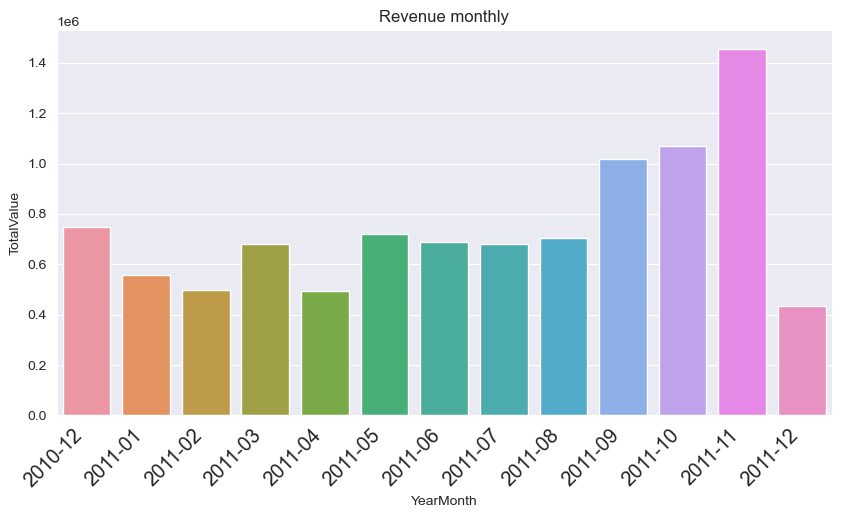

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(grouped_value_yearmonth, x='YearMonth', y='TotalValue').set(title='Revenue monthly')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

In [50]:
grouped_quantity_dayname=pd.DataFrame(df_cleaned_wo_outliers.groupby(['DayName','WeekDay'])['Quantity'].sum()).sort_values('WeekDay').reset_index()

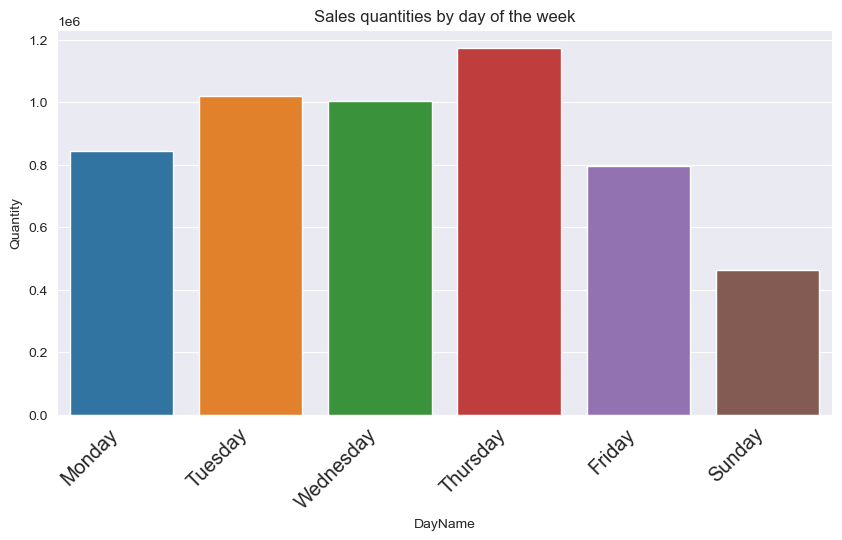

In [51]:
plt.figure(figsize=(10,5))
sns.barplot(grouped_quantity_dayname, x='DayName', y='Quantity').set(title='Sales quantities by day of the week')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

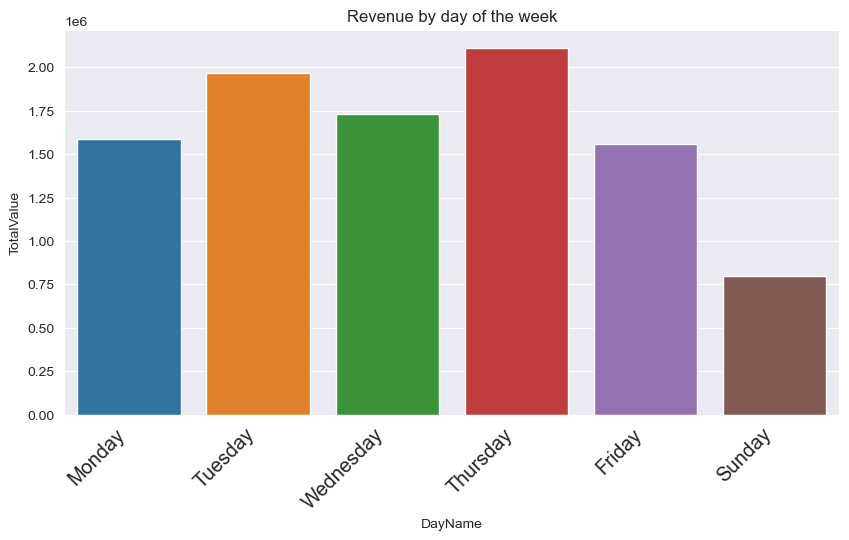

In [52]:
grouped_value_dayname=pd.DataFrame(df_cleaned_wo_outliers.groupby(['DayName','WeekDay'])['TotalValue'].sum()).sort_values('WeekDay').reset_index()
plt.figure(figsize=(10,5))
sns.barplot(grouped_value_dayname, x='DayName', y='TotalValue').set(title='Revenue by day of the week')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

## Top 20 best selling products - by quantiy and value
Iunderstand that task concerned best selling products by quantitu - bu for all companies it is important not only what are the most popular products, but even more - where the reveniue is comming from.

In [53]:
products_grouped_quantity=pd.DataFrame(df_cleaned_wo_outliers.groupby(['StockCode','Description_y'])['Quantity'].sum()).sort_values('Quantity', ascending=False).reset_index()
top_20_products_quantity=products_grouped_quantity.head(20)
top_20_products_quantity

,StockCode,Description_y,Quantity
0,22197,POPCORN HOLDER,56427
1,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53751
2,85099B,JUMBO BAG RED RETROSPOT,47256
3,84879,ASSORTED COLOUR BIRD ORNAMENT,36282
4,21212,PACK OF 72 RETROSPOT CAKE CASES,36016
5,85123A,CREAM HANGING HEART T-LIGHT HOLDER,35063
6,23084,RABBIT NIGHT LIGHT,30631
7,22492,MINI PAINT SET VINTAGE,26437
8,22616,PACK OF 12 LONDON TISSUES,26095
9,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24719


In [54]:
products_grouped_value=pd.DataFrame(df_cleaned_wo_outliers.groupby(['StockCode','Description_y'])['TotalValue'].sum()).sort_values('TotalValue', ascending=False).reset_index()
top_20_products_value=products_grouped_value.head(20)
top_20_products_value

,StockCode,Description_y,TotalValue
0,DOT,DOTCOM POSTAGE,206245.48
1,22423,REGENCY CAKESTAND 3 TIER,164459.49
2,47566,PARTY BUNTING,98243.88
3,85123A,CREAM HANGING HEART T-LIGHT HOLDER,97838.45
4,85099B,JUMBO BAG RED RETROSPOT,92175.79
5,23084,RABBIT NIGHT LIGHT,66661.63
6,POST,POSTAGE,66230.64
7,22086,PAPER CHAIN KIT 50'S CHRISTMAS,63715.24
8,84879,ASSORTED COLOUR BIRD ORNAMENT,58792.42
9,79321,CHILLI LIGHTS,53746.66


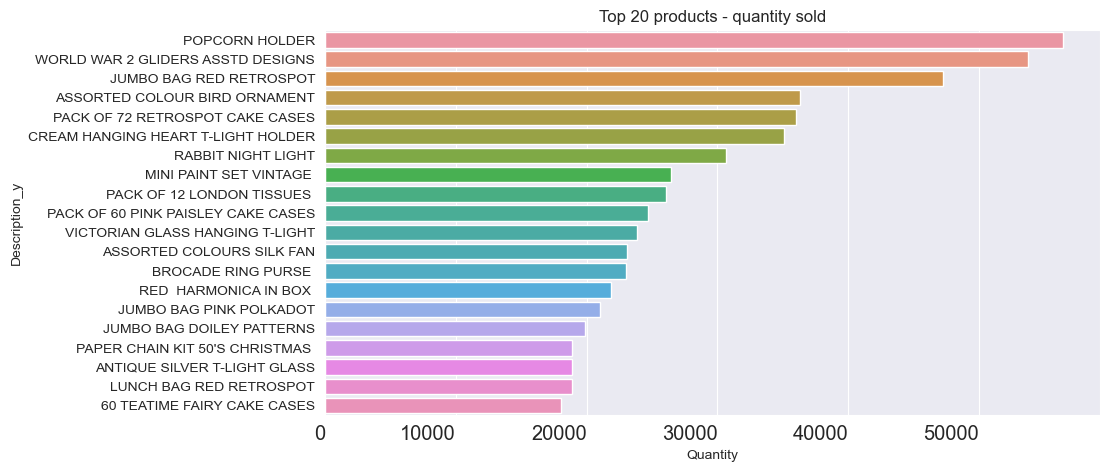

In [55]:
plt.figure(figsize=(10,5))
sns.barplot(top_20_products_quantity, y='Description_y', x='Quantity', orient='h').set(title='Top 20 products - quantity sold')
plt.xticks( 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

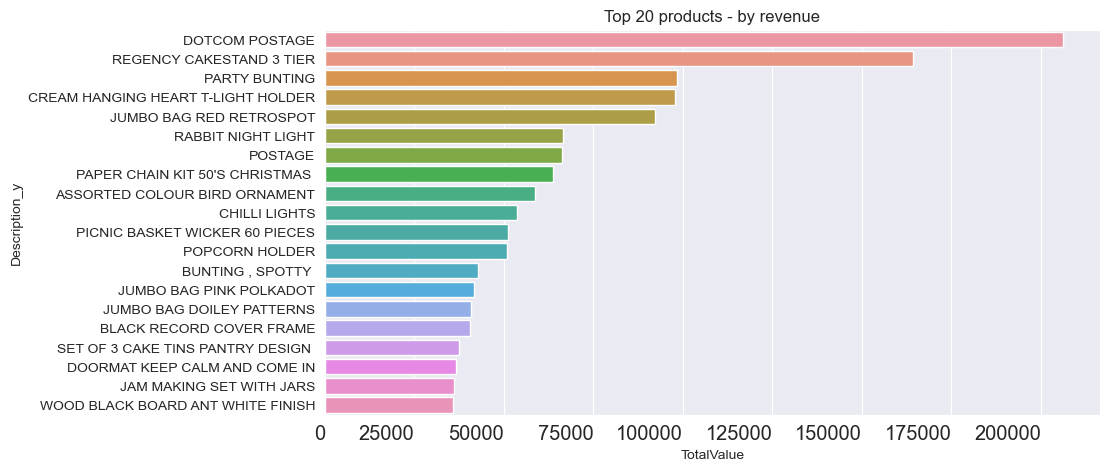

In [56]:
plt.figure(figsize=(10,5))
sns.barplot(top_20_products_value, y='Description_y', x='TotalValue', orient='h').set(title='Top 20 products - by revenue')
plt.xticks( 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

## Top countries

In [63]:
countries_grouped_quantity=pd.DataFrame(df_cleaned_wo_outliers.groupby(['Country'])['Quantity'].sum()).sort_values('Quantity', ascending=False).reset_index()
top_10_countries_quantity=countries_grouped_quantity.head(10)


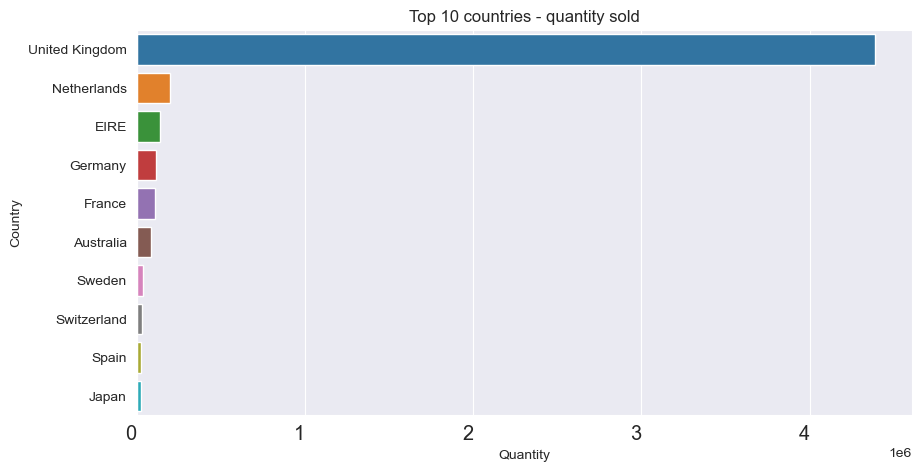

In [64]:
plt.figure(figsize=(10,5))
sns.barplot(top_10_countries_quantity, y='Country', x='Quantity', orient='h').set(title='Top 10 countries - quantity sold')
plt.xticks( 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

In [66]:
countries_grouped_value=pd.DataFrame(df_cleaned_wo_outliers.groupby(['Country'])['TotalValue'].sum()).sort_values('TotalValue', ascending=False).reset_index()
top_10_countries_value=countries_grouped_value.head(10)

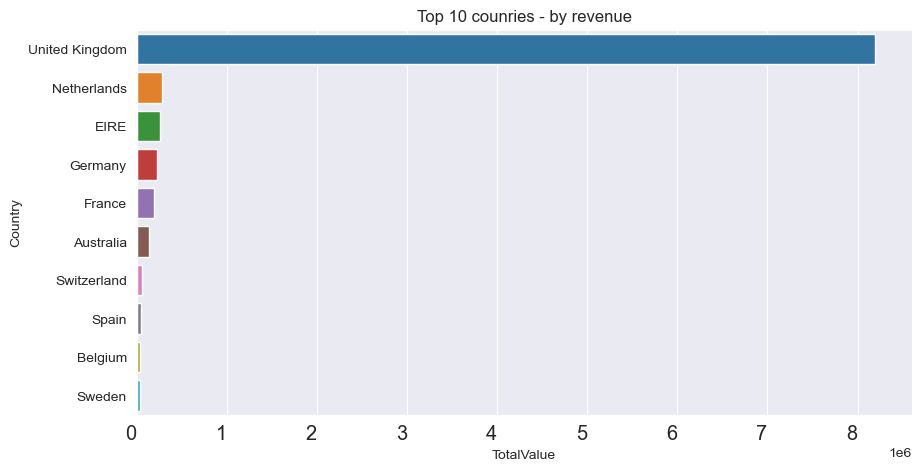

In [68]:
plt.figure(figsize=(10,5))
sns.barplot(top_10_countries_value, y='Country', x='TotalValue', orient='h').set(title='Top 10 counries - by revenue')
plt.xticks( 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

### Few final suggestions
If you want to be able to make decisions basing on data - you must make sure that the data is collected in best possible way. It is best to keep data concerning sales separately to othe stock movements.
I would suggest to create product categories (including separate category for fees, postages etc.), it would allow to veryfy which are actually best selling products by range - as there is 3937 unique product codes in the dataet.

### Final analysis results.
We can say that quantities sold are generally growing from December 2010 do November 2011 (with small drop in April), but it is to short period of time to be able to say if it is a sales increase or rather seasonality effect.

Busiest month of the year in term of quantity and value is November, and busies day of week is Thursday, with Tuesday on second place.

Best selling product in term of quantity is 22197 POPCORN HOLDER, but in term of revenue - it is on 11th position, with DOT DOTCOM POSTAGE on first position.

Most of products are sold in United Kingdom, with Netherlands on the second place (but far behind).